# Exploring the Relationship between Movie Revenue and Year, Runtime, Popularity, and Budget in the 21st Century

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data used in the following sections is from https://github.com/udacity/new-dand-basic-china/blob/master/%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E5%85%A5%E9%97%A8/%E9%A1%B9%E7%9B%AE-%E6%8E%A2%E7%B4%A2%E6%95%B0%E6%8D%AE%E9%9B%86/%E6%8E%A2%E7%B4%A2%E6%95%B0%E6%8D%AE%E9%9B%86%20-%20%E5%A4%87%E9%80%89%E6%95%B0%E6%8D%AE%E9%9B%86.md

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> This markdown aims to explore the relationship between movie revenue and year, runtime, popularity, and budget in the 21st century.

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.shape

(10866, 21)

> Through df.shape command, we know the number of rows and columns of the dataset. This dataset includes 10,866 observations, with 21 variables.

In [4]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


> Using df.head, we get the first rows of the movie dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> df.info returns the number of nulls in, and the data type of each column.

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Here, we calculate the number of nulls in each column.

In [7]:
df.duplicated().sum()

1

> There is one duplicated row in the dataset.


### Data Cleaning

In [8]:
df_21 = df.query('release_year>=2000')

> Since we only care about the movies in the 21st century, the first step in this section is to filter the corresponding rows.

In [9]:
index = ['original_title', 'revenue_adj', 'budget_adj', 'runtime', 'popularity', 'release_year']
df_21 = df_21[index]

> In addition, we extract the columns that are of interest.

In [10]:
df_21.shape

(7168, 6)

In [11]:
df_21.isnull().sum()

original_title    0
revenue_adj       0
budget_adj        0
runtime           0
popularity        0
release_year      0
dtype: int64

In [12]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7168 entries, 0 to 8887
Data columns (total 6 columns):
original_title    7168 non-null object
revenue_adj       7168 non-null float64
budget_adj        7168 non-null float64
runtime           7168 non-null int64
popularity        7168 non-null float64
release_year      7168 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 364.0+ KB


In [13]:
df_21.describe()

,revenue_adj,budget_adj,runtime,popularity,release_year
count,7.168000e+03,7.168000e+03,7168.000000,7168.000000,7168.000000
mean,4.501970e+07,1.767841e+07,99.737723,0.693524,2009.018136
std,1.326838e+08,3.632479e+07,33.352364,1.129084,4.341236
min,0.000000e+00,0.000000e+00,0.000000,0.000620,2000.000000
25%,0.000000e+00,0.000000e+00,89.000000,0.204303,2006.000000
50%,0.000000e+00,0.000000e+00,97.000000,0.390768,2010.000000
75%,2.319898e+07,1.894612e+07,109.000000,0.767455,2013.000000
max,2.827124e+09,4.250000e+08,900.000000,32.985763,2015.000000


> From the summary statistics, we can detect whether there exists outliers in the dataset. Please note that the min of both revenue and budget equal zero. Besides, the maximum of runtime is 900 minutes, which is not normal for a movie. In fact, the items in the TMDb dataset include not only movies but also TV shows, such as Frank Herbert's Dune. Consequently, for the following analyses, we will focus on those whose runtime is between 60 to 180 minutes.

In [14]:
df_21 = df_21.query('runtime >= 60 and runtime < 180 and revenue_adj > 0 and budget_adj > 0')

In [15]:
df_21.describe()

,revenue_adj,budget_adj,runtime,popularity,release_year
count,2.489000e+03,2.489000e+03,2489.000000,2489.000000,2489.000000
mean,1.259005e+08,4.628817e+07,107.756529,1.332739,2008.062274
std,1.986547e+08,4.857005e+07,17.115557,1.674664,4.403181
min,2.370705e+00,9.693980e-01,62.000000,0.001117,2000.000000
25%,1.514377e+07,1.266292e+07,95.000000,0.513438,2005.000000
50%,5.669017e+07,2.995307e+07,105.000000,0.895829,2008.000000
75%,1.464947e+08,6.255997e+07,117.000000,1.535278,2012.000000
max,2.827124e+09,4.250000e+08,179.000000,32.985763,2015.000000


> The current dataset does not contain any outliers anymore.

In [16]:
df_21.duplicated().sum()

1

In [17]:
df_21.drop_duplicates(inplace = True)

In [18]:
df_21.duplicated().sum()

0

> These previous three steps remove the duplicated observations in the dataset.

In [19]:
df_21['release_year'] = pd.to_datetime(df_21['release_year'], format = '%Y')

> We change the data type of release year here.

In [20]:
df_21.rename(columns = {'revenue_adj':'revenue', 'budget_adj': 'budget'}, inplace = True)

> Simplify the row names of a few variables.

In [21]:
df_21.tail()

,original_title,revenue,budget,runtime,popularity,release_year
8862,Shadow of the Vampire,1.048365e+07,1.013034e+07,92,0.119214,2000-01-01
8866,The Adventures of Rocky & Bullwinkle,4.449095e+07,9.623820e+07,88,0.104908,2000-01-01
8868,The Big Kahuna,4.721861e+06,8.864045e+06,90,0.091492,2000-01-01
8881,Hanging Up,4.563452e+07,5.065168e+07,94,0.031018,2000-01-01
8883,The In Crowd,6.606877e+06,1.899438e+07,105,0.015997,2000-01-01


<a id='eda'></a>
## Exploratory Data Analysis


### 1: Revenue of Movies in the 21st Century

#### Independent Variable: release year, Dependent Variable: revenue

In [22]:
year_revenue = df_21.groupby('release_year')['revenue'].sum()

In [23]:
year_revenue

release_year
2000-01-01    1.386587e+10
2001-01-01    1.575690e+10
2002-01-01    1.746921e+10
2003-01-01    1.615183e+10
2004-01-01    1.903185e+10
2005-01-01    1.735184e+10
2006-01-01    1.691787e+10
2007-01-01    1.957748e+10
2008-01-01    1.911324e+10
2009-01-01    2.196150e+10
2010-01-01    2.180349e+10
2011-01-01    2.269191e+10
2012-01-01    2.296905e+10
2013-01-01    2.242611e+10
2014-01-01    2.217063e+10
2015-01-01    2.410668e+10
Name: revenue, dtype: float64

> We sum the total number of revenue in each year.

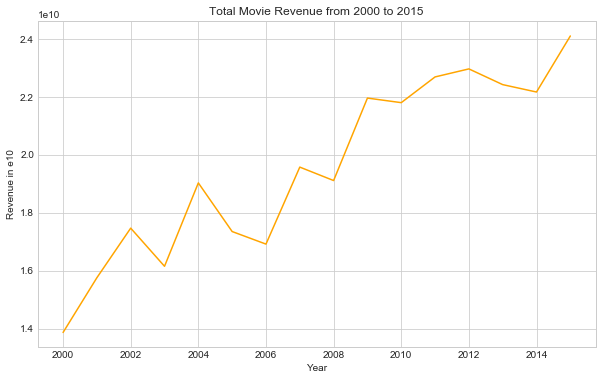

In [24]:
sns.set_style('whitegrid')

year_revenue.plot(figsize = (10,6), color = 'orange')
plt.xlabel('Year')
plt.ylabel('Revenue in e10')
plt.title('Total Movie Revenue from 2000 to 2015');

From the line plot above, we can see overall, the revenue increases from 2000 to 2015, but the numbers fluctuate quite a bit. For instance, the total revenue first increased then decreased from 2000 to 2003. What might also worth noticing is that the revenues is impacted by inflation. In other words, the value of 1 dollar differs in 2000 and 2015. For future research, we may consider using 2015 inflation level to normalize the movie revenues.

### 2: Relationship between Revenue and Runtime

#### Independent Variable: Runtime, Dependent Variable: Revenue

In [25]:
df_21.head()

,original_title,revenue,budget,runtime,popularity,release_year
0,Jurassic World,1.392446e+09,1.379999e+08,124,32.985763,2015-01-01
1,Mad Max: Fury Road,3.481613e+08,1.379999e+08,120,28.419936,2015-01-01
2,Insurgent,2.716190e+08,1.012000e+08,119,13.112507,2015-01-01
3,Star Wars: The Force Awakens,1.902723e+09,1.839999e+08,136,11.173104,2015-01-01
4,Furious 7,1.385749e+09,1.747999e+08,137,9.335014,2015-01-01


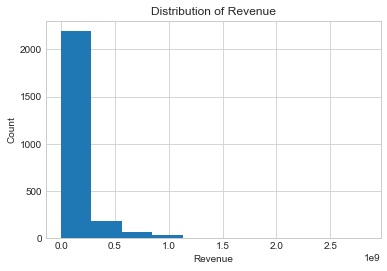

In [26]:
plt.hist(df_21['revenue'])

plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Distribution of Revenue');

> Apparently, the distribution of revenue is skewed.

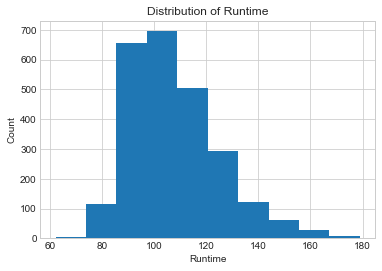

In [27]:
plt.hist(df_21['runtime'])

plt.xlabel('Runtime')
plt.ylabel('Count')
plt.title('Distribution of Runtime');

> The distribution of runtime shows a similar pattern, but it's not as skewed as the one of revenue.

In [28]:
df_21[['revenue', 'runtime']].corr()

,revenue,runtime
revenue,1.000000,0.319021
runtime,0.319021,1.000000


> We calculate the Pearson Correlation Coefficient to see the extent to which these two variables are associated.

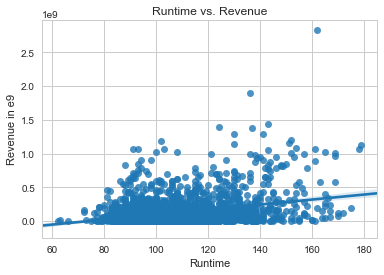

In [29]:
sns.set_context('notebook')
sns.regplot(x=df_21["runtime"], y=df_21["revenue"], fit_reg=True)

plt.xlabel('Runtime')
plt.ylabel('Revenue in e9')
plt.title('Runtime vs. Revenue');

> With the seaborn library, we can produce the scatterplot and the regression fit line here.

In [30]:
df_21['runtime'].describe()

count    2488.000000
mean      107.762862
std        17.116081
min        62.000000
25%        95.000000
50%       105.000000
75%       117.000000
max       179.000000
Name: runtime, dtype: float64

In [31]:
bin_edges = [62, 95, 105, 117, 179]
bin_names = ['short','mid', 'mid-long', 'long']

df_21['runtime_level'] = pd.cut(df_21['runtime'], bin_edges, labels=bin_names)

> We recode the runtime variable into four categories using quantile breaks.

In [32]:
df_21['runtime_level'].value_counts()

mid         650
short       638
long        620
mid-long    579
Name: runtime_level, dtype: int64

In [33]:
df_21.groupby('runtime_level')['revenue'].mean()

runtime_level
short       9.327396e+07
mid         8.754680e+07
mid-long    1.084389e+08
long        2.163937e+08
Name: revenue, dtype: float64

> The average values of revenue are given by the code above.

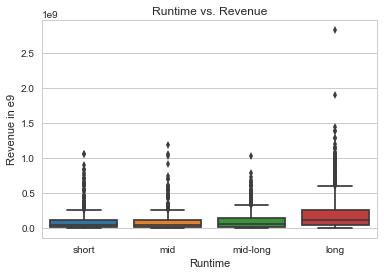

In [34]:
sns.boxplot(x=df_21['runtime_level'], y=df_21['revenue'])

plt.xlabel('Runtime')
plt.ylabel('Revenue in e9')
plt.title('Runtime vs. Revenue');

In this section, we look into the relationship between revenue and runtime. First of all, the correlation coefficient equals 0.319, indicating a relatively weak linear relationship between the two variables. This aspect is also proven by the later scatterplot. In addition, we separate the runtime into four categories, and calculate the average revenue of each class. Surprisingly, the average revenue of "mid" is lower than the one of "short". It means that the movie revenue will not follow the same trend of runtime. As can be seen in the boxplot, the distribution of the first three classes are very similar.

### 3: Relationship between Revenue and Popularity

#### Independent Variable: popularity, Dependent Variable: Revenue

In [35]:
df_21.head()

,original_title,revenue,budget,runtime,popularity,release_year,runtime_level
0,Jurassic World,1.392446e+09,1.379999e+08,124,32.985763,2015-01-01,long
1,Mad Max: Fury Road,3.481613e+08,1.379999e+08,120,28.419936,2015-01-01,long
2,Insurgent,2.716190e+08,1.012000e+08,119,13.112507,2015-01-01,long
3,Star Wars: The Force Awakens,1.902723e+09,1.839999e+08,136,11.173104,2015-01-01,long
4,Furious 7,1.385749e+09,1.747999e+08,137,9.335014,2015-01-01,long


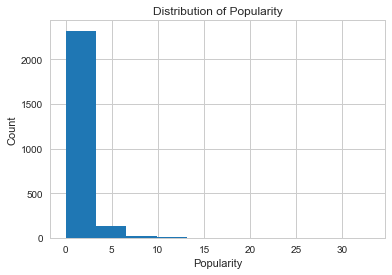

In [36]:
plt.hist(df_21['popularity'])

plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity');

> Analogous to revenue, the distribution of popularity is right-skewed.

In [37]:
df_21[['revenue', 'popularity']].corr()

,revenue,popularity
revenue,1.000000,0.595301
popularity,0.595301,1.000000


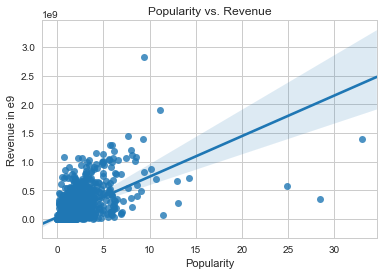

In [38]:
sns.regplot(x=df_21["popularity"], y=df_21["revenue"], fit_reg=True)

plt.xlabel('Popularity')
plt.ylabel('Revenue in e9')
plt.title('Popularity vs. Revenue');

In [39]:
df_21['popularity'].describe()

count    2488.000000
mean        1.333035
std         1.674936
min         0.001117
25%         0.513318
50%         0.896547
75%         1.536028
max        32.985763
Name: popularity, dtype: float64

In [40]:
bin_edges1 = [df_21['popularity'].describe()['min'], df_21['popularity'].describe()['25%'], df_21['popularity'].describe()['50%'], 
              df_21['popularity'].describe()['75%'], df_21['popularity'].describe()['max']]
bin_names1 = ['low','mid', 'mid-high', 'high']

df_21['pop_level'] = pd.cut(df_21['popularity'], bin_edges1, labels=bin_names1)

In [41]:
df_21.tail(15)

,original_title,revenue,budget,runtime,popularity,release_year,runtime_level,pop_level
8798,Under Suspicion,3.299476e+05,3.165730e+07,110,0.471019,2000-01-01,mid-long,low
8799,Ready to Rumble,1.566709e+07,3.039101e+07,107,0.196668,2000-01-01,mid-long,low
8801,Center Stage,2.178140e+07,2.279326e+07,115,0.253319,2000-01-01,mid-long,low
8804,Return to Me,4.635895e+07,3.039101e+07,115,0.249219,2000-01-01,mid-long,low
8808,Saving Grace,3.334208e+07,1.266292e+07,93,0.223263,2000-01-01,short,low
8809,The Broken Hearts Club: A Romantic Comedy,2.209500e+06,1.266292e+06,94,0.222291,2000-01-01,short,low
8815,Drowning Mona,1.953533e+07,2.026067e+07,96,0.207785,2000-01-01,mid,low
8817,Gun Shy,2.066385e+06,1.266292e+07,101,0.203554,2000-01-01,mid,low
8826,X-Men,1.991874e+08,9.497191e+07,104,0.182246,2000-01-01,mid,low
8860,The Little Vampire,1.716584e+07,2.785843e+07,95,0.123920,2000-01-01,short,low


In [42]:
df_21['pop_level'].value_counts()

high        622
mid-high    622
mid         622
low         621
Name: pop_level, dtype: int64

In [43]:
df_21.groupby('pop_level')['revenue'].mean()

pop_level
low         2.927576e+07
mid         6.434916e+07
mid-high    1.032452e+08
high        3.069734e+08
Name: revenue, dtype: float64

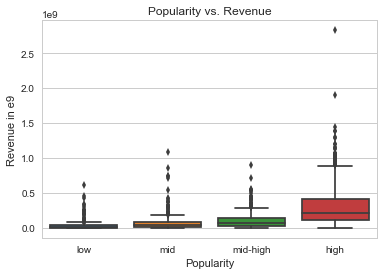

In [44]:
sns.boxplot(x=df_21['pop_level'], y=df_21['revenue'])

plt.xlabel('Popularity')
plt.ylabel('Revenue in e9')
plt.title('Popularity vs. Revenue');

This section explores the relationship between revenue and popularity. The correlation coefficient equals 0.6, much higher than the one shown in the previous section. We use a similar methodology to reclassify the popularity variable, and find that the average revenue increases as the popularity climbs. To conclude, revenue and popularity is positively associated with each other.

### 4: Relationship between Revenue and Budget

#### Independent Variable: budget, Dependent Variable: revenue

In [45]:
df_21.head()

,original_title,revenue,budget,runtime,popularity,release_year,runtime_level,pop_level
0,Jurassic World,1.392446e+09,1.379999e+08,124,32.985763,2015-01-01,long,high
1,Mad Max: Fury Road,3.481613e+08,1.379999e+08,120,28.419936,2015-01-01,long,high
2,Insurgent,2.716190e+08,1.012000e+08,119,13.112507,2015-01-01,long,high
3,Star Wars: The Force Awakens,1.902723e+09,1.839999e+08,136,11.173104,2015-01-01,long,high
4,Furious 7,1.385749e+09,1.747999e+08,137,9.335014,2015-01-01,long,high


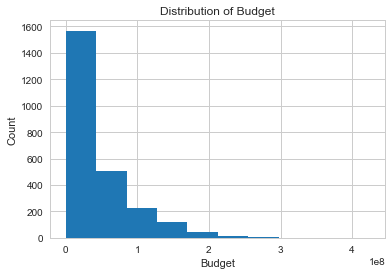

In [46]:
plt.hist(df_21['budget'])

plt.xlabel('Budget')
plt.ylabel('Count')
plt.title('Distribution of Budget');

> The same right-skewed distribution

In [47]:
df_21[['revenue', 'budget']].corr()

,revenue,budget
revenue,1.000000,0.716031
budget,0.716031,1.000000


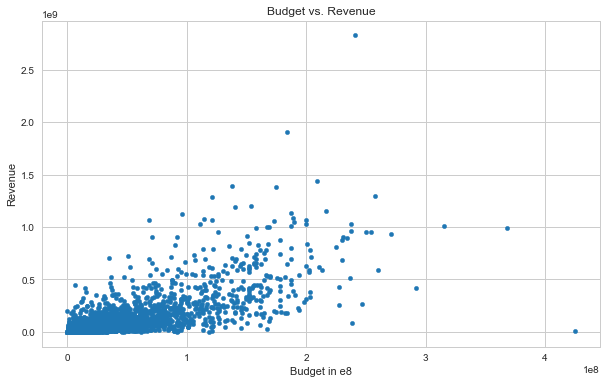

In [48]:
df_21.plot.scatter(x='budget', y='revenue', figsize = (10,6))

plt.xlabel('Budget in e8')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue');

In [49]:
df_21['budget'].describe()

count    2.488000e+03
mean     4.629471e+07
std      4.857872e+07
min      9.693980e-01
25%      1.266215e+07
50%      2.979344e+07
75%      6.257853e+07
max      4.250000e+08
Name: budget, dtype: float64

In [50]:
bin_edges2 = [df_21['budget'].describe()['min'], df_21['budget'].describe()['25%'], df_21['budget'].describe()['50%'], 
              df_21['budget'].describe()['75%'], df_21['budget'].describe()['max']]
bin_names2 = ['low','mid', 'mid-high', 'high']

df_21['budget_level'] = pd.cut(df_21['budget'], bin_edges2, labels=bin_names2)

In [51]:
df_21.iloc[[x for x in np.arange(1,100,10)], :]

,original_title,revenue,budget,runtime,popularity,release_year,runtime_level,pop_level,budget_level
1,Mad Max: Fury Road,3.481613e+08,1.379999e+08,120,28.419936,2015-01-01,long,high,high
11,Jupiter Ascending,1.692686e+08,1.619199e+08,124,6.189369,2015-01-01,long,high,high
21,Southpaw,8.437300e+07,2.759999e+07,123,5.337064,2015-01-01,long,high,mid
32,Pitch Perfect 2,2.645056e+08,2.667999e+07,115,3.877764,2015-01-01,mid-long,high,mid
43,The Man from U.N.C.L.E.,9.949346e+07,6.899997e+07,116,3.053421,2015-01-01,mid-long,high,high
54,Point Break,1.230212e+08,9.659996e+07,114,2.614499,2015-01-01,mid-long,high,high
64,Focus,1.416459e+08,4.609198e+07,105,2.395366,2015-01-01,mid,high,mid-high
78,The Night Before,4.820430e+07,2.299999e+07,100,2.096273,2015-01-01,mid,high,mid
89,Child 44,3.058382e+06,4.599998e+07,137,1.956320,2015-01-01,long,high,mid-high
105,The Wedding Ringer,7.341586e+07,2.115999e+07,101,1.510096,2015-01-01,mid,mid-high,mid


In [52]:
df_21['budget_level'].value_counts()

high        622
mid-high    622
mid         622
low         621
Name: budget_level, dtype: int64

In [53]:
df_21.groupby('budget_level')['revenue'].mean()

budget_level
low         2.287363e+07
mid         5.234459e+07
mid-high    1.041229e+08
high        3.244986e+08
Name: revenue, dtype: float64

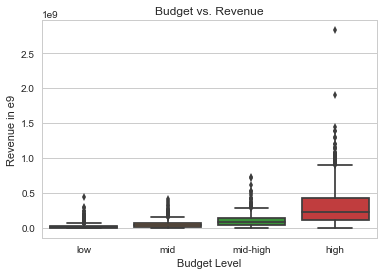

In [54]:
sns.boxplot(x=df_21['budget_level'], y=df_21['revenue'])

plt.xlabel('Budget Level')
plt.ylabel('Revenue in e9')
plt.title('Budget vs. Revenue');

In this section, we dig into the relationship between budget and revenue. The Pearson Correlation Coefficient of 0.716 indicates that the two variables are highly correlated. Similar to the previous exploratory analyses, we seperate the budget into four categories. As the budget level increases, the average movie revenue tends to climb as well. Furthermore, the overall level of the last box in the boxplot is considerably higher than its counterparts. As a result, we conclude that movie revenue and budget is positively correlated.

<a id='conclusions'></a>
## Conclusions


This report uses the TMDb data from https://github.com/udacity/new-dand-basic-china/blob/master/%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E5%85%A5%E9%97%A8/%E9%A1%B9%E7%9B%AE-%E6%8E%A2%E7%B4%A2%E6%95%B0%E6%8D%AE%E9%9B%86/%E6%8E%A2%E7%B4%A2%E6%95%B0%E6%8D%AE%E9%9B%86%20-%20%E5%A4%87%E9%80%89%E6%95%B0%E6%8D%AE%E9%9B%86.md, to explore the relationship between movie revenue and year, runtime, popularity as well as budget. The findings are as follows.

Generally speaking, the revenue increases from 2000 to 2015, but the numbers fluctuate quite a bit. What might also worth noticing is that the revenue is impacted by inflation. In other words, the value of 1 dollar differs in 2000 and 2015. For future research, we may consider using 2015 inflation level to normalize the movie revenues.

In addition, among runtime, popularity, and budget, the report discovers that the degree to which revenue and budget are associated to each other is the highest, while revenue and runtime are least correlated to one another. However, it does not indicate a causal relationship between independent and dependent variables.

Regarding the next steps, as previously mentioned, we can use cpi inflation calculator to normalize the revenue of each year. Secondly, we can also use regression methods to further explore the relationships between revenue and independent variables. And since the distributions of most variables are skewed, it would be more appropriate to perform log transformation before running regression.